# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | conceicao do araguaia
Processing Record 2 of Set 1 | hami
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | sayyan
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | caravelas
Processing Record 8 of Set 1 | walvis bay
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | port macquarie
Processing Record 11 of Set 1 | tunduru
City not found. Skipping...
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | abu jubayhah
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | port hedland
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | belushya guba
City not f

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,conceicao do araguaia,-8.2578,-49.2647,30.07,65,29,0.78,BR,1676320866
1,hami,42.8000,93.4500,-0.82,49,3,1.36,CN,1676320753
2,lompoc,34.6391,-120.4579,17.79,76,100,4.47,US,1676320867
3,sayyan,15.1718,44.3244,11.99,32,5,1.51,YE,1676320868
4,mahebourg,-20.4081,57.7000,24.58,94,75,0.00,MU,1676320868


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conceicao do araguaia,-8.2578,-49.2647,30.07,65,29,0.78,BR,1676320866
1,hami,42.8000,93.4500,-0.82,49,3,1.36,CN,1676320753
2,lompoc,34.6391,-120.4579,17.79,76,100,4.47,US,1676320867
3,sayyan,15.1718,44.3244,11.99,32,5,1.51,YE,1676320868
4,mahebourg,-20.4081,57.7000,24.58,94,75,0.00,MU,1676320868


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

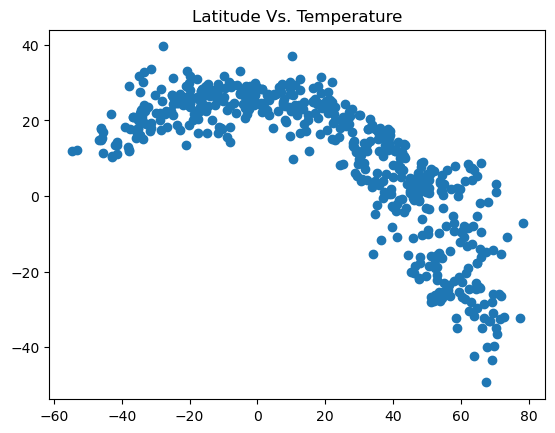

In [9]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x, y)
plt.title("Latitude Vs. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

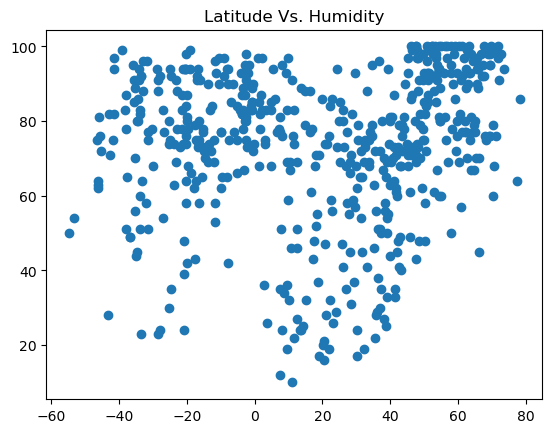

In [11]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x, y)
plt.title("Latitude Vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

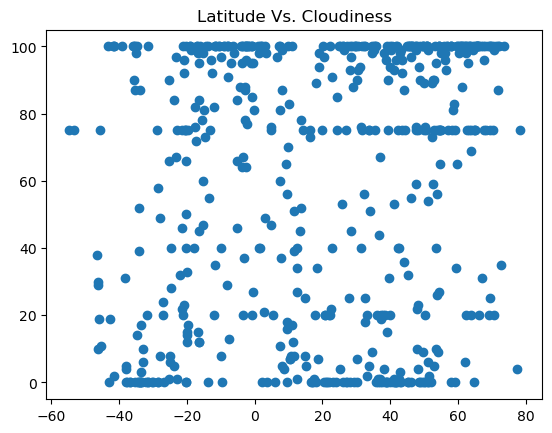

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x, y)
plt.title("Latitude Vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

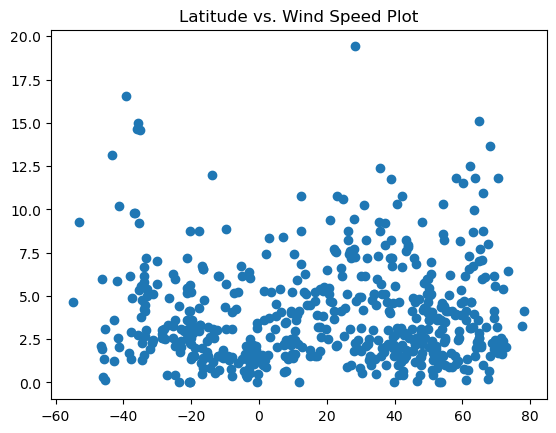

In [13]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x, y)
plt.title("Latitude vs. Wind Speed Plot")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel("Latitude")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=14, color="green")
    
    # State r-value
    return print(f"The r- value is: {round(rvalue**2,8)}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hami,42.8000,93.4500,-0.82,49,3,1.36,CN,1676320753
2,lompoc,34.6391,-120.4579,17.79,76,100,4.47,US,1676320867
3,sayyan,15.1718,44.3244,11.99,32,5,1.51,YE,1676320868
11,bethel,41.3712,-73.4140,14.24,33,0,1.54,US,1676320605
13,qaanaaq,77.4840,-69.3632,-32.19,64,4,3.24,GL,1676320873


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,conceicao do araguaia,-8.2578,-49.2647,30.07,65,29,0.78,BR,1676320866
4,mahebourg,-20.4081,57.7000,24.58,94,75,0.00,MU,1676320868
5,caravelas,-17.7125,-39.2481,26.11,79,76,2.97,BR,1676320869
6,walvis bay,-22.9575,14.5053,17.53,88,1,2.06,NaN,1676320870
7,ushuaia,-54.8000,-68.3000,11.81,50,75,4.63,AR,1676320828


###  Temperature vs. Latitude Linear Regression Plot

The r- value is: 0.69564677


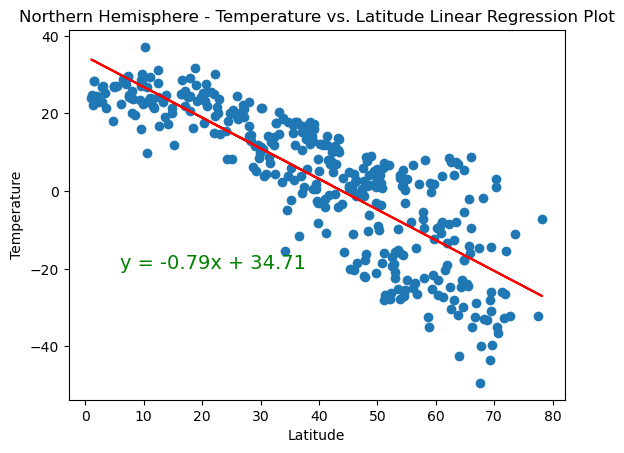

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression Plot")
plt.ylabel("Temperature")
plot_linear_regression(x_values,y_values,"Max Temp",(6,-20))

# Save graph as png
plt.savefig("../output_data/Fig5.png")
plt.show()

The r- value is: 0.27352527


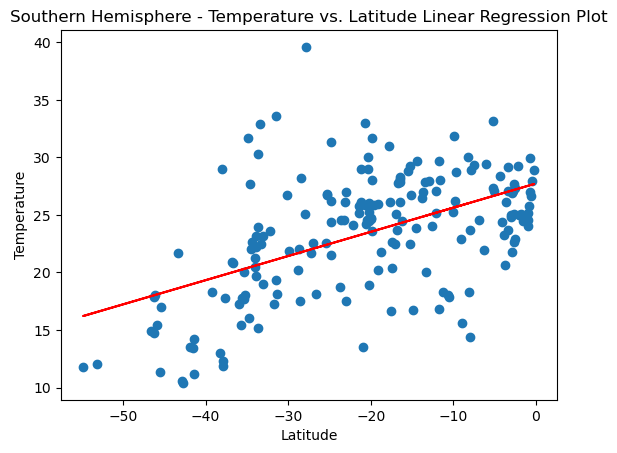

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression Plot")
plt.ylabel("Temperature")
plot_linear_regression(x_values,y_values,"Max Temp",(6,-20))

# Save graph as png
plt.savefig("../output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemispheres have the same inverse relationship between latitude and temperature. That said, as you may know if you've ever taken a earth science class, the closer we get to the equater, the warmer it gets. Go fig!

### Humidity vs. Latitude Linear Regression Plot

The r- value is: 0.18626775


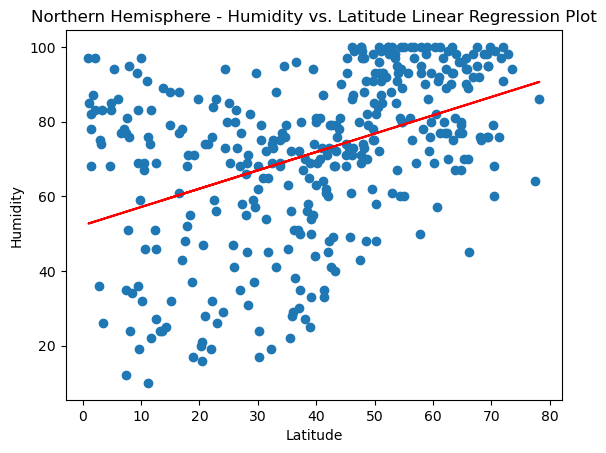

In [22]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression Plot")
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values,"Humidity",(6,-20))

# Save graph as png
plt.savefig("../output_data/Fig7.png")
plt.show()

The r- value is: 0.05631976


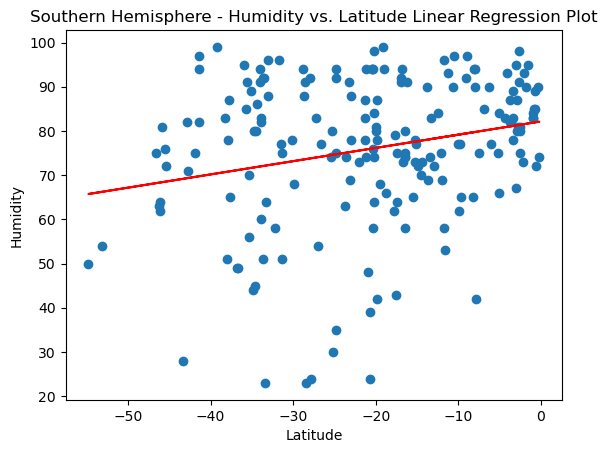

In [26]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression Plot")
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values,"Humidity",(6,-20))

# Save graph as png
plt.savefig("../output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r- value is: 0.06399673


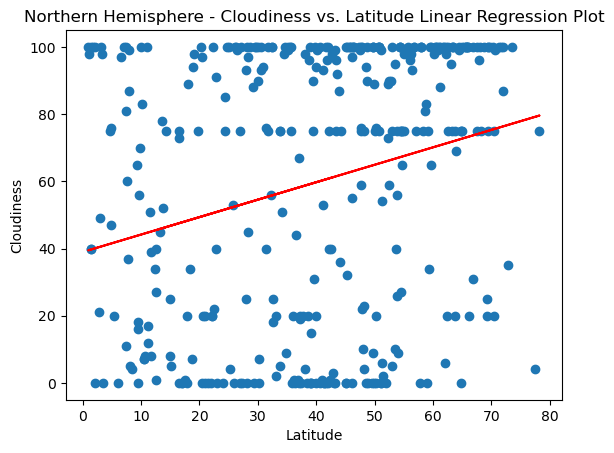

In [25]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values,"Cloudiness",(6,-20))

# Save graph as png
plt.savefig("../output_data/Fig9.png")
plt.show()

The r- value is: 0.17341687


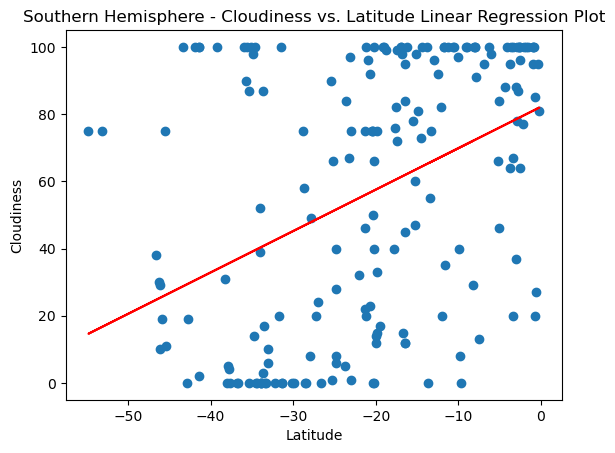

In [27]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values,"Cloudiness",(6,-20))

# Save graph as png
plt.savefig("../output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r- value is: 0.000609


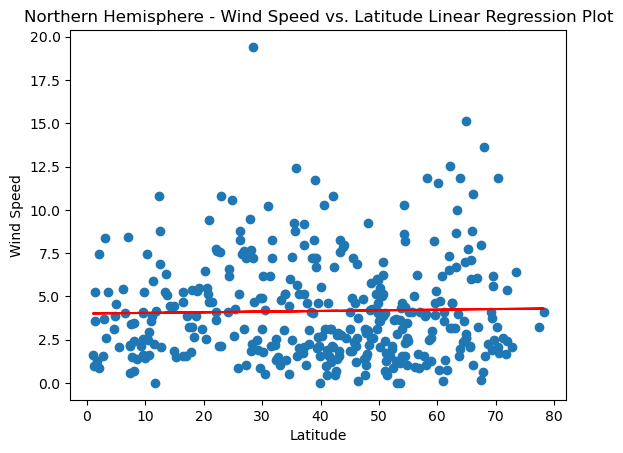

In [28]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values,"Wind Speed",(6,-20))

# Save graph as png
plt.savefig("../output_data/Fig10.png")
plt.show()

The r- value is: 0.12121149


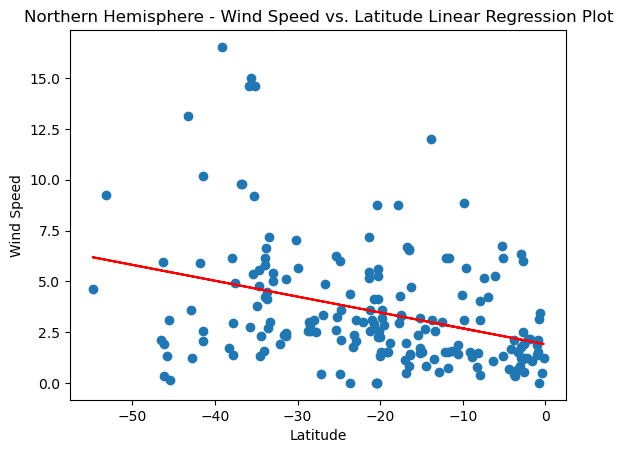

In [29]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values,"Wind Speed",(6,-20))

# Save graph as png
plt.savefig("../output_data/Fig11.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE